# Problem 1 (Practice)

In this problem, we will investigate how many patterns or ground states can be stored for a given $N$.

(a) Let $N=100$. We will try the number of stored patterns $p\in \{1,5,10,15,20,25\}$. Repeat the following $R=20$ times.

1. Generate $p$ random patterns of length $N$ with entries $\pm 1$.
2. Train the Hopfield network on these patterns.
3. For each stored pattern, create a corrupted version by flipping 10% of its bits. Run the update for a fixed number (10) of sweeps across the data bits. Check whether the final state equals the original pattern.
4. Compute the retrieval success rate (fraction of patterns succesfully recovered).

For each $p$, average the retrival success rate over the $R$ trials.

For $p=5, 15$, plot the stored values, corrupted values, retrived values, and the error bits ($\xi_iS_i$) (80 pts)

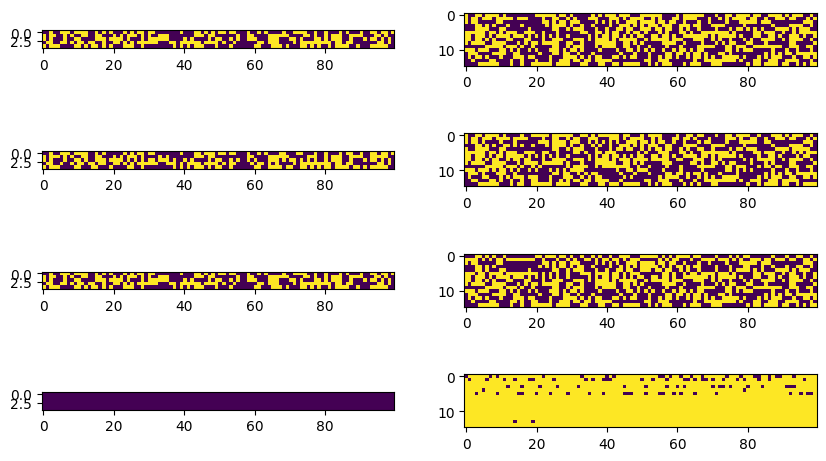

In [100]:
'''
- Define the necessary variable and list
- Create 4 x 2 subplots to plot the stored, corrupted, retrieved, error bits for p = 5 and p = 15
- With a 0.1 probability, flipped the spin of the pattern, which generates the corrupted pattern
'''

import numpy as np
import matplotlib.pyplot as plt

N = 100 # Number of neurons
ps = [1, 5, 10, 15, 20, 25] # Number of patterns
R = 20 # Number of trials

success_rates = [] # success rate of each trial
avg_success_rates = [] # average success rate of each pattern (final mean performance for each pattern)
fig, ax = plt.subplots(4, 2, figsize=(10, 6))

for p in ps:
    for _ in range(R):
        xi = np.random.choice([-1, 1], size=(p, N)) # generate random pattern
        J = xi.T @ xi / N # interaction matrix

        # Plot when p = 5 or 15
        if p == ps[1]: ax[0, 0].imshow(xi)
        if p == ps[3]: ax[0, 1].imshow(xi)

        corrupted_S = xi.copy()
        for i in range(p):
            for j in range(N):
                if np.random.rand() < 0.1:
                    corrupted_S[i, j] *= -1

        MaxStep = 10 # sweep through the network 10 times
        successes = 0
        S = corrupted_S.copy()
        
        # Plot when p = 5 or 15
        if p == ps[1]: ax[1, 0].imshow(S)
        if p == ps[3]: ax[1, 1].imshow(S)

        for i in range(p):
            F = J @ S[i] # compute the initial local field for the current pattern i
            for _ in range(MaxStep):
                for k in range(N):
                    dE = 2 * (F[k] * S[i, k] - J[k, k])
                    if dE < 0: # flipping this spin (S_k  ->  -S_k) reduce the energy of the system
                        F -= 2 * J[:, k] * S[i, k] # update rule for the local field
                        S[i, k] *= -1 # flip the spin
            if np.array_equal(S[i], xi[i]):
                successes += 1
        
        # Plot when p = 5 or 15
        if p == ps[1]:
            ax[2, 0].imshow(S)
            ax[3, 0].imshow(xi * S)
        if p == ps[3]:
            ax[2, 1].imshow(S)
            ax[3, 1].imshow(xi * S)
            
        success_rates.append(successes / p)
    
    avg_success_rates.append(np.mean(success_rates[-R:]))

(b) Plot average success rate vs. storage ratio $P/N$. Approximately up to which storage ratio $P/N$ does retrieval remain reliable? Does this roughly agree with the theoretical capacity which is around $0.1\sim0.15$? (10 pts) (20 pts)

Text(0, 0.5, 'Average Retrieval Success Rate')

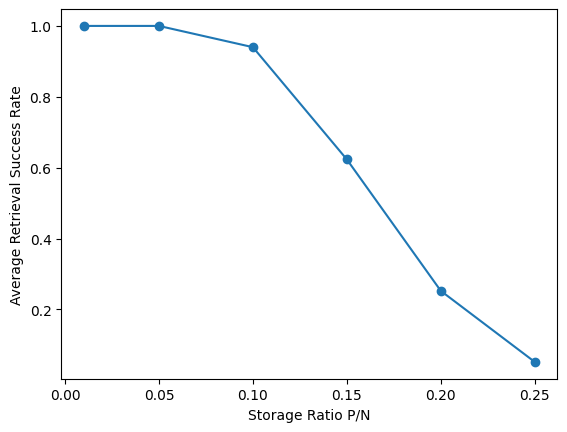

In [101]:
plt.plot(np.array(ps)/N, avg_success_rates, marker='o')
plt.xlabel('Storage Ratio P/N')
plt.ylabel('Average Retrieval Success Rate')

Reliablitiy
- Highly reliable for P/N = 0.0~0.1
- From the P/N = 0.15, success rate decrease nearly 0.6, which means the memory system fails to represent
- So, we can conclude taht the transition point(reliability start to fail) exists between 0.1 and 0.15

Theoretical capacity
- Roughly agree with the theoretical capacity which is around 0.1~0.15 since above analysis of reliability

---
# Problem 2

In this problem, we will see the Hopfield networks can converge to weird attractors, not just stored patterns.

(a) Generate $p=3$ patterns with $N=100$ bits. The first pattern has 1 for the first $N/4$ bits and -1 for the rest. The second pattern has 1 for the last $N/4$ bits and -1 for the rest. The third pattern has 1 for the middle $N/2$ bits and -1 for the rest. Train the Hopfield network. Plot the stored patterns. (20 pts)


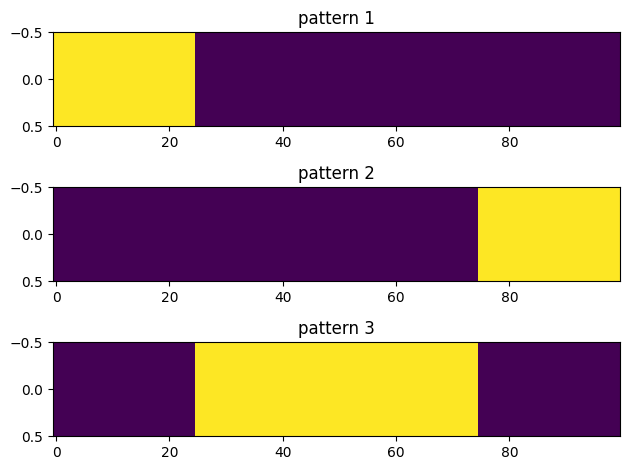

In [102]:
'''
- Define relevant variables and initialize the patterns
- Compute the interaction matrix and train the Hopfield network
- Plot it
'''

N = 100
p = 3

xi = -1 * np.ones((p, N))
xi[0, :N//4] = 1
xi[1, -N//4:] = 1
xi[2, N//4 : N//4 + N//2] = 1

J = xi.T @ xi / N

fig, ax = plt.subplots(p, 1)
pat_desc = ['pattern 1','pattern 2','pattern 3']

for i in range(p):
    ax[i].imshow(xi[i].reshape(1, N), aspect='auto')
    ax[i].set_title(pat_desc[i])

plt.tight_layout()
plt.show()

(b) Generate $M=200$ random initial states. Run the model by iterating over all bits until either the state stops changing or a maximum number of iterations are reached (3). (30 pts)

In [103]:
'''
- Generate the random initial states S 
- Run the loop of the update rule follow the problem description
'''

M = 200
MaxStep = 3
final_states = []

for _ in range(M):
    S = np.random.choice([-1, 1], size=N)
    F = J @ S

    for _ in range(MaxStep):
        is_stable = True
        for k in range(N):
            dE = 2 * (F[k] * S[k] - J[k, k])
            if dE < 0:
                F -= 2 * J[:, k] * S[k]
                S[k] *= -1
                is_stable = False
        if is_stable:
            break
    
    final_states.append(S.copy())
final_states = np.array(final_states)

(c) For each final state, if it does not match one of the $p$ stored patterns, it is a spurious result. Plot these spurious results. (30 pts)

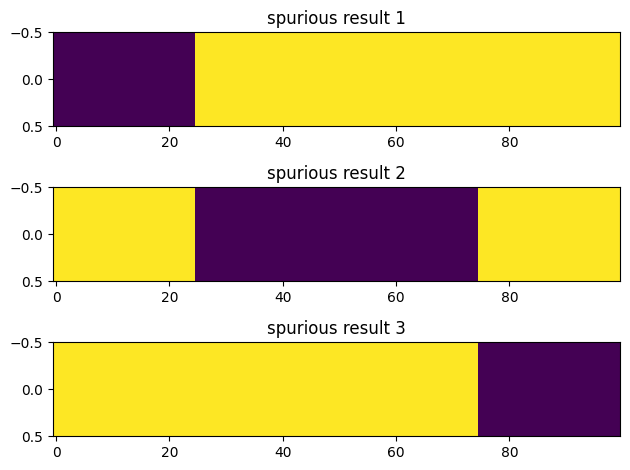

In [104]:
'''
- If the state is not one of the stored patterns, it is spurious
- Find unique spurious patterns to avoid plotting duplicates
- And plot the spurious states
'''

spurious_states = []
for _S in final_states:
    is_stored_pattern = False
    for _p in range(p):
        if np.array_equal(_S, xi[_p]):
            is_stored_pattern = True
            break
    if not is_stored_pattern:
        spurious_states.append(_S)

spurious_states = np.array(spurious_states)

if len(spurious_states) > 0:
    unique_spurious = np.unique(spurious_states, axis=0)
    fig, ax = plt.subplots(len(unique_spurious), 1)
    
    for i in range(len(unique_spurious)):
        ax[i].imshow(unique_spurious[i].reshape(1, N), aspect='auto')
        ax[i].set_title(f'spurious result {i+1}')
    
    plt.tight_layout()
    plt.show()

else:
    print("no spurious states found")

(d) From the shapes of the spurious results, describe what is happening [Hint: The energy is symmetric upon what?]. What is the expected number of spurious states, and does the number of spurious states match you expectations? (20 pts)

1. What is happening

    The results are 
    - spurious results 1 -> inverse of pattern 1
    - spurious results 2 -> inverse of pattern 3
    - spurious results 3 -> inverse of pattern 2

    Write it as
    - $\mathbf{S}_{spur}^{(1)} = -\boldsymbol{\xi}^1$
    - $\mathbf{S}_{spur}^{(2)} = -\boldsymbol{\xi}^3$
    - $\mathbf{S}_{spur}^{(3)} = -\boldsymbol{\xi}^2$

    Its because symmetry of the energy function. The energy function is
    $$E(\mathbf{S}) = -\frac{1}{2} \sum_{i,j} J_{ij} S_i S_j$$

    Spse we invert every spin $S_i \to -S_i$ then
    $$(-S_i)(-S_j) = S_i S_j$$

    So,
    $$E(\mathbf{S}) = E(-\mathbf{S})$$

    The energy landscape is perfectly symmetric under the global inversion.



2. Number of the spurious states, match with expectation

    - Since the symmetry of the energy function, every stored pattern $\boldsymbol{\xi}^\mu$ implies the existence of inverse state $-\boldsymbol{\xi}^\mu$
    - So, the expected number of spurious states is 3 (corresponding to the inverses of the 3 stored patterns)
    - The simulation results perfectly matched this expectation
